In [7]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from arnie.mfe import mfe
import seaborn as sns
import pandas as pd
plt.rcParams['svg.fonttype'] = 'none'

In [8]:
# get pairwise alignments for the SL5 domains which were studied
# note the cryo-EM constructs were often slight truncations of these sequences
fasta = '../data/SL5_studied.fasta'
seqs = list(SeqIO.parse(open(fasta),'fasta'))
gap_exclude, blast, num_comp = 0,0,0
for i,seqA in enumerate(seqs):
    for seqB in seqs[i+1:]:
        alignments = pairwise2.align.globalxx(seqA.seq, seqB.seq)
        print(seqA.name)
        print(format_alignment(*alignments[0]))
        print(seqB.name)
        # number of matches / min length\
        num_matches = format_alignment(*alignments[0]).split('\n')[1].count('|')
        avg_length = (len(seqA.seq)+len(seqB.seq))/2
        min_length = min(len(seqA.seq),len(seqB.seq))
        print(100*(num_matches/min_length))
        print(100*(num_matches/len(format_alignment(*alignments[0]).split('\n')[1])))
        gap_exclude += 100*(num_matches/min_length)
        blast += 100*(num_matches/len(format_alignment(*alignments[0]).split('\n')[1]))
        num_comp += 1
print(gap_exclude/num_comp,blast/num_comp)

SARS-CoV-2
UCGUUGACAG-GACA-CGAGUAACUCGUCUA--UCUUCUGCAGG-CUGCUUACGGUUUCGUCCGUGUUGCAGC-CGAUCAUCAGCACAU-C-UAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCC-CU-GGUU-UCAACGA
|||||||||  || | |||||||||||||    ||||||||| | |||||||||||||||||||||||||||  ||||||||||  ||| | ||||||||||||||||||||||||||||||||||||||||||||||   || || | |||||||
UCGUUGACA-AGA-AACGAGUAACUCGUC--CCUCUUCUGCA-GACUGCUUACGGUUUCGUCCGUGUUGCAG-UCGAUCAUCAG--CAUACCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGU--UCUUGG-UGUCAACGA
  Score=134

SARS-CoV-1
92.41379310344827
85.8974358974359
SARS-CoV-2
UCGUUGA-CAG---GA-CA--CGA-GUAACUCGUCUA-U-CU-UCUGCAGGCUGCU----UAC--GGUUUCGUCCGUGUUGCAGCCGAU--CA-U-CAG---CACAUCUAG-GU-UU-CGUCCGG--G-UGUGACCGA---AAGGUA---------A-G-AUG-GAG-AGCCUUG-UC--C-CUGGUUUCAACGA-
|  ||   |||   || |   ||  ||  ||| | |  | |  ||| | || | |     |||  ||||||||||| | |   | || |  || | | |   |||||| |  || || |||  ||  | ||||||||    |||||          | | ||  ||| || |  | ||  | || |    ||  | 
U--UU--UCAGUUAGAGC-GUCG-UGU--CUC-U-U-GUAC-GUCU-C-GG-U-

In [10]:
# for all reference seqeunce SL5 domains, get the (blast defined) sequence identity
seqs = list(SeqIO.parse(open('../data/SL5_reference_sequences.fasta'),'fasta'))
data = np.zeros((len(seqs),len(seqs)))
names,genus,subgenus = [],[],[]
for i,seqA in enumerate(seqs):
    desc = seqA.description.split()
    names.append(desc[0])
    genus.append(desc[1])
    if len(desc)>2:
        subgenus.append(desc[2])
    else:
        subgenus.append('-')
    
    for j,seqB in enumerate(seqs):
        alignments = pairwise2.align.globalxx(seqA.seq, seqB.seq)
        # number of matches / min length
        num_matches = format_alignment(*alignments[0]).split('\n')[1].count('|')
        blast = 100*(num_matches/len(format_alignment(*alignments[0]).split('\n')[1]))
        data[i,j] = blast

In [11]:
df = pd.DataFrame(data,columns=names,index=names)
df_names = pd.DataFrame(np.array([genus,subgenus]).T,columns=['Genus','Subgenus'],index=names)

colorsA = plt.get_cmap('tab20b').colors
colorsB = plt.get_cmap('tab20c').colors

genus_colors = {'Alphacoronavirus':'red','Betacoronavirus':'blue'}
subgenus_colors = {'-':'grey',
                  'Decacovirus':'#5A0001','Nyctacovirus':'#EB8F7D','Setracovirus':'#643F43','Tegacovirus':'#FDF49B','Luchacovirus':'#FCEC52','Minacovirus':'#FFBB5C','Duvinacovirus':'#F45B69',
                   'Myotacovirus':'#D36135','Minunacovirus':'#FF9505','Rhinacovirus':'#D84797','Pedacovirus':'red',
                  'Embecovirus':'#8FAD88','Sarbecovirus':'#588CDA','Merbecovirus':'#1B4079','Nobecovirus':'#737BD4','Hibecovirus':'#3943B7'}
genus_colors = {'Alphacoronavirus':'red','Betacoronavirus':'blue'}
subgenus_colors = {'-':'white',
                  'Decacovirus':colorsA[1],'Nyctacovirus':colorsA[18],'Setracovirus':colorsA[13],'Tegacovirus':colorsA[16],'Luchacovirus':colorsA[14],'Minacovirus':colorsA[15],
                   'Duvinacovirus':colorsA[0],'Myotacovirus':colorsA[19],'Minunacovirus':colorsA[17],'Rhinacovirus':colorsA[3],'Pedacovirus':colorsA[2],
                  'Embecovirus':'lightgrey','Sarbecovirus':colorsB[0],'Merbecovirus':colorsB[1],'Nobecovirus':colorsB[2],'Hibecovirus':colorsB[3]}
df_names['Genus'] = df_names.Genus.map(genus_colors)
df_names['Subgenus'] = df_names.Subgenus.map(subgenus_colors)

51.21101677619411


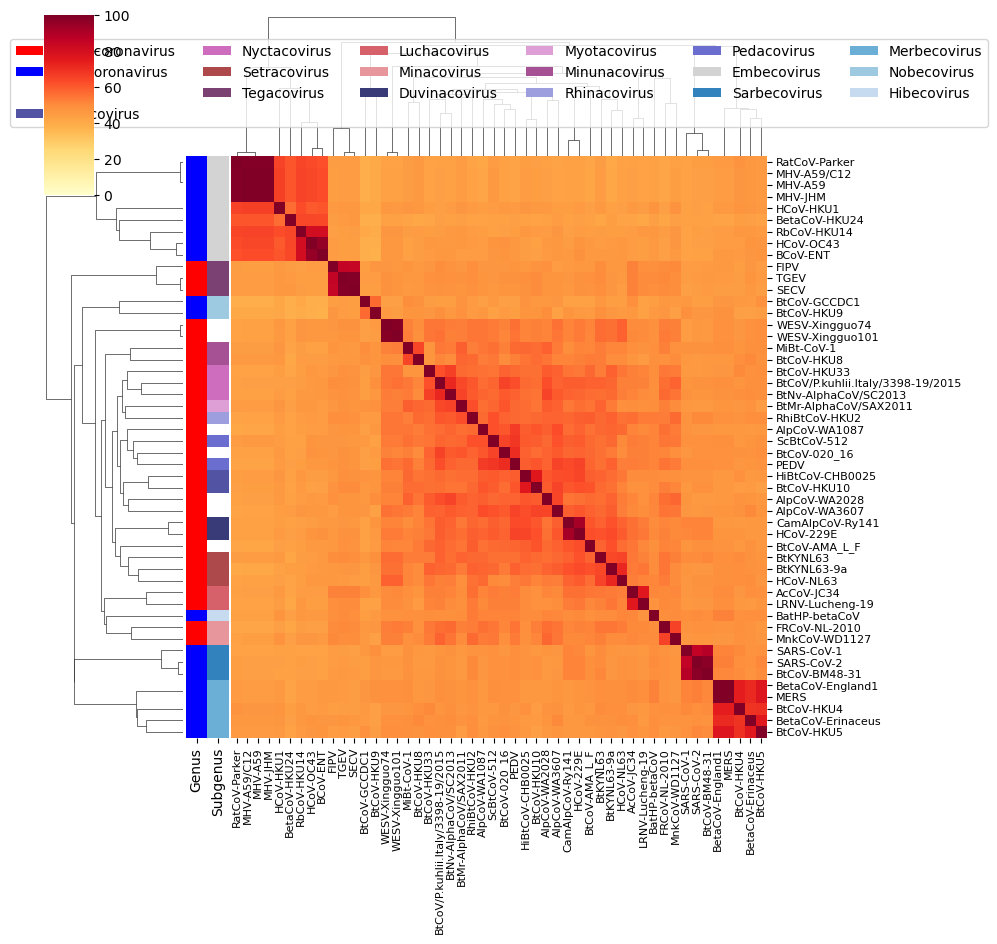

In [12]:
g = sns.clustermap(df,cmap="YlOrRd", vmin=0, vmax=100,yticklabels=True,xticklabels=True,row_colors=df_names)
t = g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 8)
t = g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 8)
# colors for each, make sure all labeled
for label in genus_colors.keys():
    g.ax_col_dendrogram.bar(0, 0, color=genus_colors[label],
                            label=label, linewidth=0)
for label in subgenus_colors.keys():
    g.ax_col_dendrogram.bar(0, 0, color=subgenus_colors[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=6)
plt.savefig('sequence_identities.svg')
print(data.mean())

In [ ]:
# code used for identifying the SL5 regions
seqs = list(SeqIO.parse(open('SL5s.fasta'),'fasta'))
for seqA in seqs:
    
seqX = 'GGCCCCCAUGGCUAGCAACCGUAUUUCGUUGGCUUUUGCCAAUGAUUCAGAGAUUUCAGCUCUUGGCUUUGGUUCCGUCGAGAGCCGUCUCAUUCUAUAGUGAGGCCGCUGUCGGUGGUUUUGCCAAUUGCCGAUUUGUCUCUACGGGUCUUCAAGACAUAAUUGAAGGCGUCCUUGAUGAUGACUACGUGUUAGUUAUUACAGGGGUGCAUCAACUAGUCGCCCGUAUAGGCCAAUUCGGUGACCAACCUUCAAAUCUUAGGGGUUGGUUGCUGUUCUC'
seqs = list(SeqIO.parse(open('SL5s.fasta'),'fasta'))
print(mfe(seqX,package="eternafold"))
for seqA in seqs:
    alignments = pairwise2.align.localxs(seqA.seq, seqX,-3,-1)
    print(seqA.name)
    print(format_alignment(*alignments[0]))